In [3]:
"""
2025-11-17 Maria Yli-Heikkilä
Plot the results to see how the adjustement works.


"""


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import faostat


# Results in:
fp = '/Users/myliheik/Documents/myPython/FBSadjusted/results/adjusted/Food-supply-quantity-kg-capita-yr-2023.csv'
df = pd.read_csv(fp)

# How many cases we have:
uniqueCases = df[['Area Code', 'Item Code', 'Domain']].drop_duplicates()
uniqueCases['Domain'].value_counts()

Domain
Old FBS                  19863
New FBS                  19863
BiasCorrectedAdjusted    19863
Name: count, dtype: int64

,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Domain,Note,MeanDiffBias,MeanDiffBiasPerc,OverlappingYears
0,2,'004,Afghanistan,2905,'S2905,Cereals - Excluding Beer,645,Food supply quantity (kg/capita/yr),1961,1961,kg/cap,309.04,E,Old FBS,NaN,NaN,NaN,4


In [2]:
# List/dictionary of items
myItemsDict = faostat.get_par('FBS', 'item')
#myItemsKeys = list(myItemsDict.keys())

In [3]:
myAreaDict = faostat.get_par('FBS', 'area')
#myAreaDict.get('Finland')

In [4]:
# Is there any with only one domain?
tmp = uniqueCases.groupby(['Area Code', 'Item Code']).size().reset_index()
len(tmp[tmp[0] == 1]) # Good! There should not be.

0

In [5]:
# How about 2? There should not be:
checkThese = tmp[tmp[0] == 2]
checkThese 

,Area Code,Item Code,0


In [6]:
# Most of the cases should have three domains?
tmp = uniqueCases.groupby(['Area Code', 'Item Code']).size().reset_index()
len(tmp[tmp[0] == 3]) # ok!

19863

In [7]:
myAreaDict = faostat.get_par('FBS', 'area')


#### FUNC:

def plotting7(data, mycountry, myElement, myItemCode, startingYear, axes):
    mycountryCode = int(myAreaDict.get(mycountry))
    # Subset data:
    data22 = data[(data['Area Code'] == mycountryCode) & (data['Element'] == myElement) & (data['Item Code'] == myItemCode)]
    #exclude BiasCorrectedAdjusted:
    data2 = data22[~(data22['Domain'] == 'BiasCorrectedAdjusted')]
    
    if data2.empty:
        print(f'Empty dataset for {mycountry}, {myItemCode}')
    
    data2 = data2.assign(Time = pd.to_datetime(data2.Year, format='%Y'))
        
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2
        
        
    if data['Unit'][0] == '1000 No':
        unit = '$\\times 10^{3}$'
    else:
        unit = data['Unit'][0]
    #print(data2)
    #print(data3['Item'].values)
    #print(data3['Item'])
    myItem = data3['Item'].values[0]
        
    ax = sns.lineplot(data3, y = 'Value', x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {myItem}')
    ax.set_ylabel(f'{myItem} ({unit})')
    
    #ax.text(pd.to_datetime('1990', format='%Y'), data3[myItem].max(), f'Correction: {data3['MeanDiffBias'].max()} ({data3['MeanDiffBiasPerc'].max()}%)')
    

def plotting8(data, mycountry, myElement, myItemCode, startingYear, axes):
    mycountryCode = int(myAreaDict.get(mycountry))
    # Subset data:
    data2 = data[(data['Area Code'] == mycountryCode) & (data['Element'] == myElement) & (data['Item Code'] == myItemCode)]
    data2 = data2.assign(Time = pd.to_datetime(data2.Year, format='%Y'))
    #print(data2)
    if startingYear:
        data3 = data2[data2['Year'].astype(int) >= startingYear]
    else:
        data3 = data2

    myItem = data3['Item'].values[0]

    #print(data3)  
    if data['Unit'][0] == '1000 No':
        unit = '$\\times 10^{3}$'
    else:
        unit = data['Unit'][0]
    #print(data3['Item'].values[0])    
    ax = sns.lineplot(data3, y = 'Value', x = 'Time', hue = 'Domain', ax = axes)
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'{mycountry}, {myItem}')
    ax.set_ylabel(f'{myItem} ({unit})')
    
    ax.text(pd.to_datetime('1990', format='%Y'), data3['Value'].max(), f'Correction: {data3['MeanDiffBias'].max()} ({data3['MeanDiffBiasPerc'].max()}%)')
      

<function matplotlib.pyplot.show(close=None, block=None)>

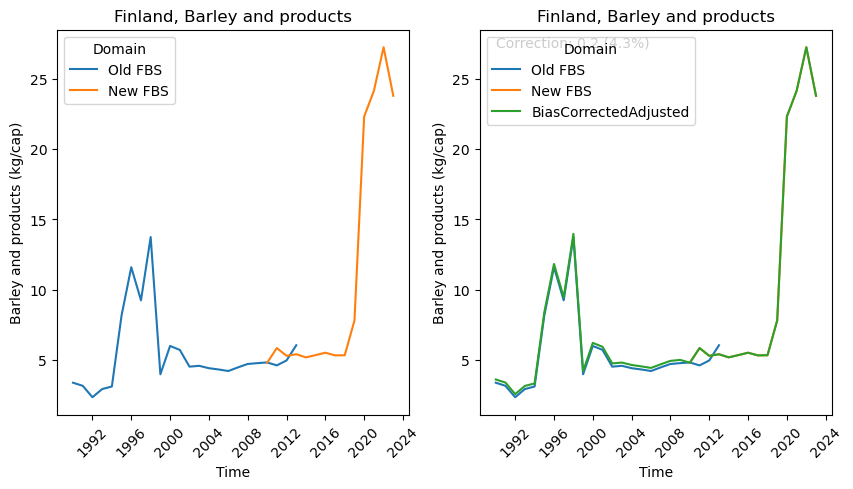

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

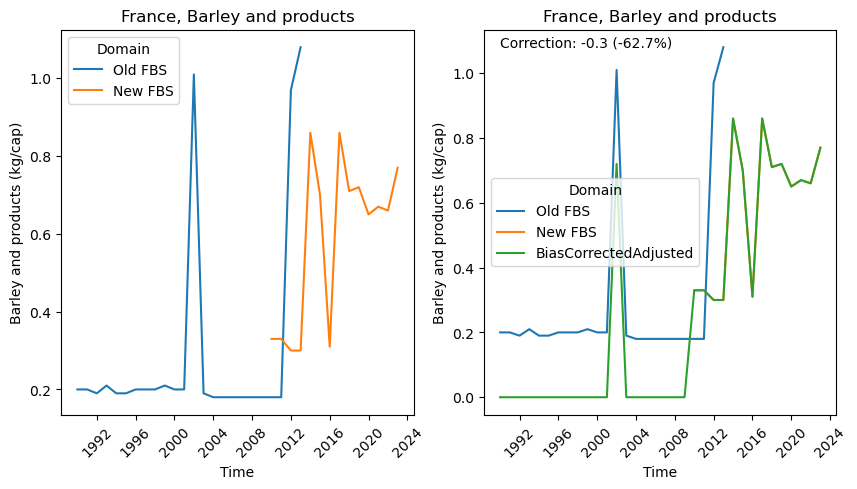

In [9]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'France'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

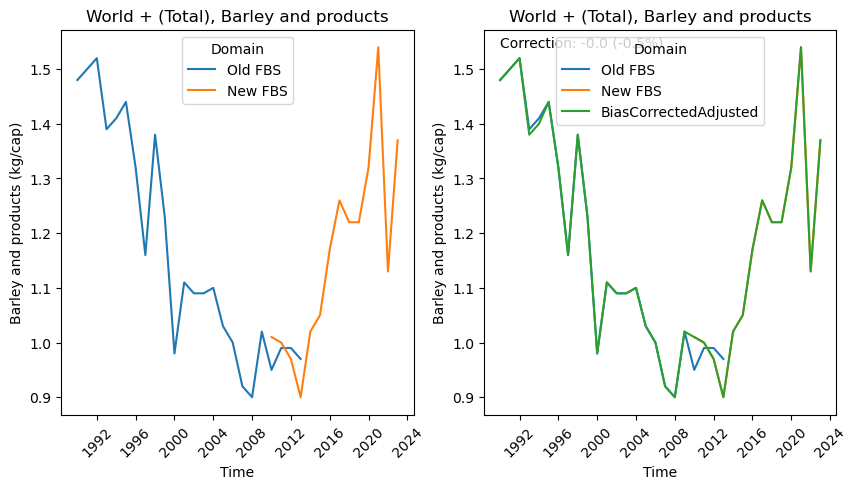

In [10]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'World + (Total)'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

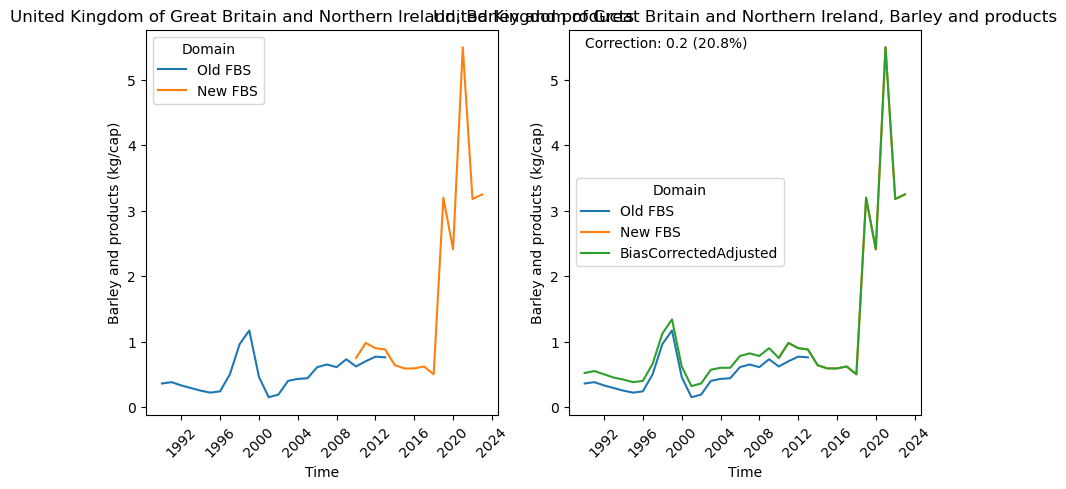

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'United Kingdom of Great Britain and Northern Ireland'
myItemCode = 2513
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

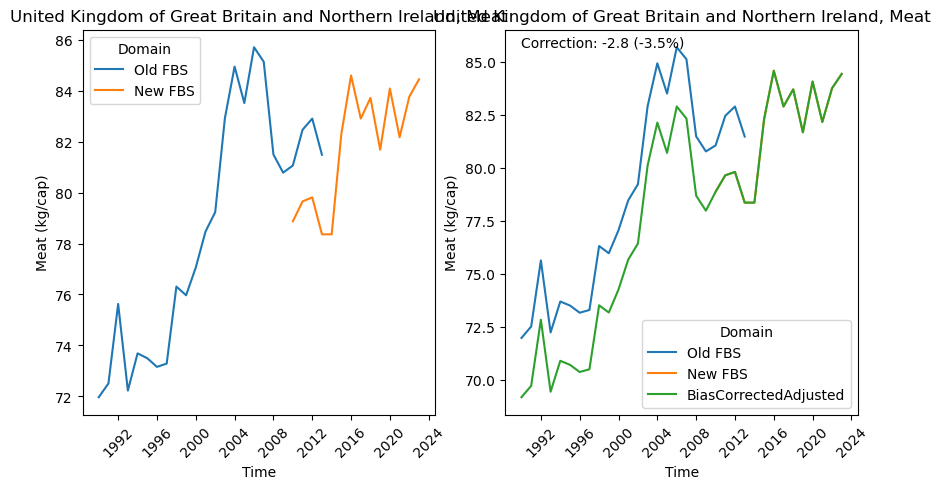

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

mycountry = 'United Kingdom of Great Britain and Northern Ireland'
myItemCode = 2943
myElement = 'Food supply quantity (kg/capita/yr)'

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2511


<function matplotlib.pyplot.show(close=None, block=None)>

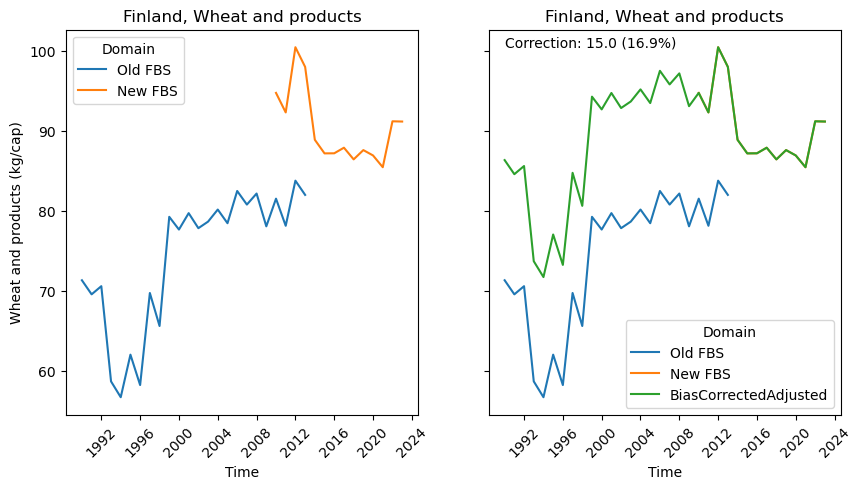

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = int(myItemsDict.get('Wheat and products'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2745


<function matplotlib.pyplot.show(close=None, block=None)>

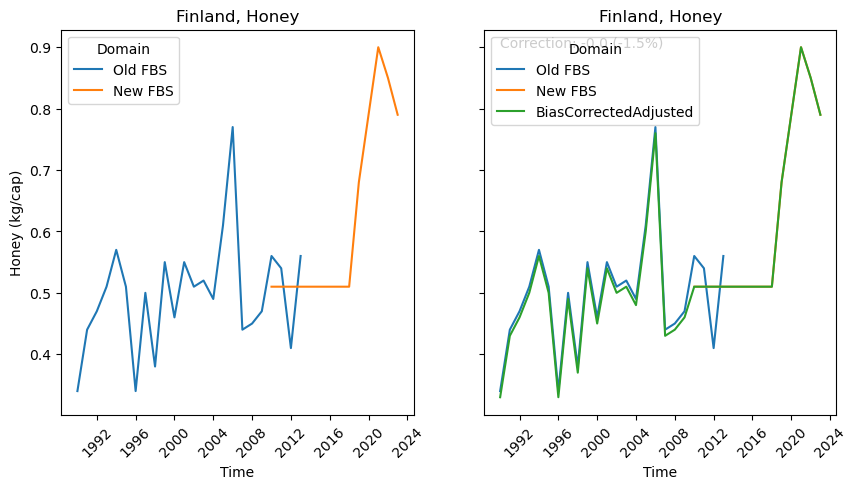

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = int(myItemsDict.get('Honey'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2731


<function matplotlib.pyplot.show(close=None, block=None)>

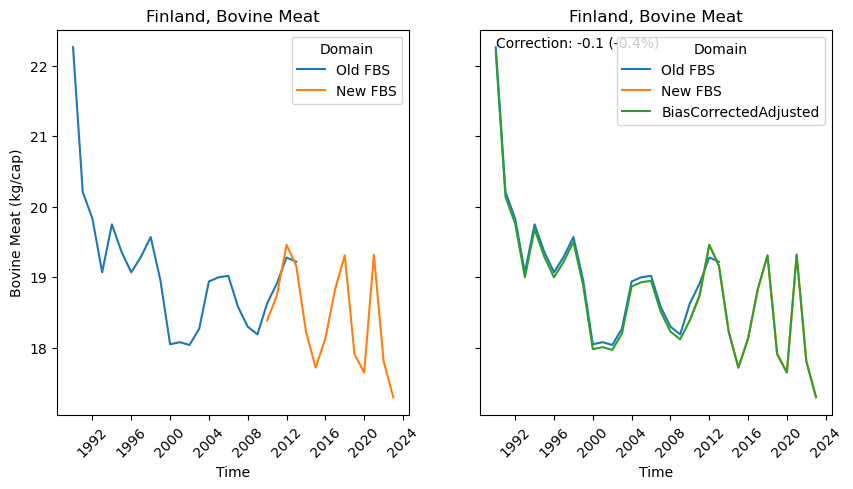

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = int(myItemsDict.get('Bovine Meat'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2546


<function matplotlib.pyplot.show(close=None, block=None)>

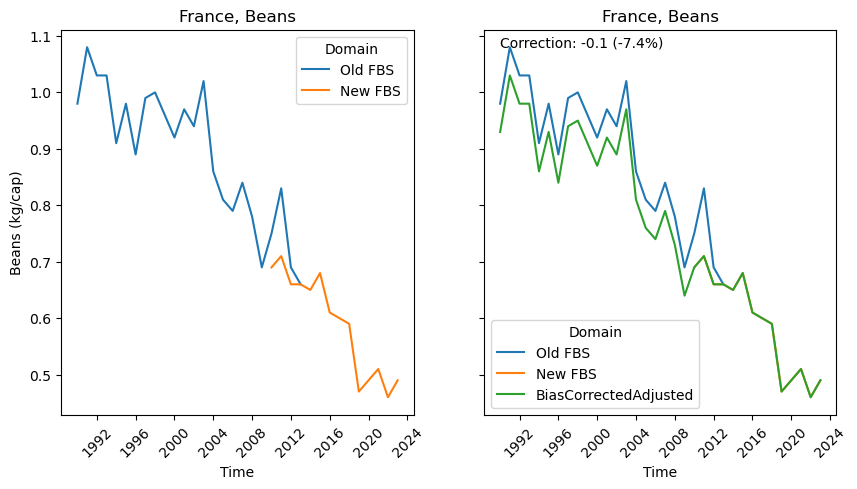

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'France'
myItemCode = int(myItemsDict.get('Beans'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2744


<function matplotlib.pyplot.show(close=None, block=None)>

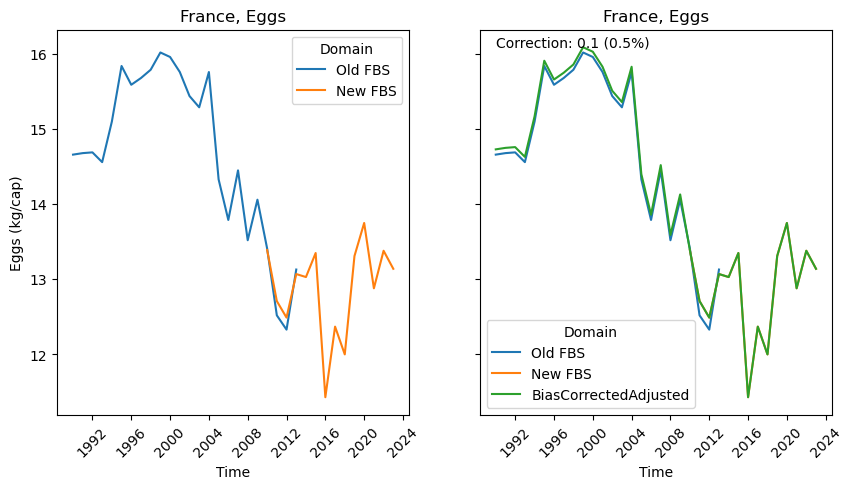

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'France'
myItemCode = int(myItemsDict.get('Eggs'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2744


<function matplotlib.pyplot.show(close=None, block=None)>

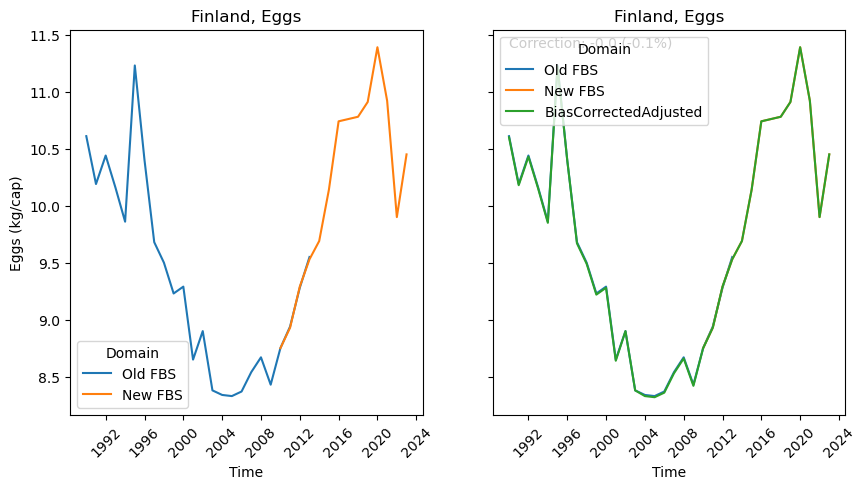

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Finland'
myItemCode = int(myItemsDict.get('Eggs'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2501


<function matplotlib.pyplot.show(close=None, block=None)>

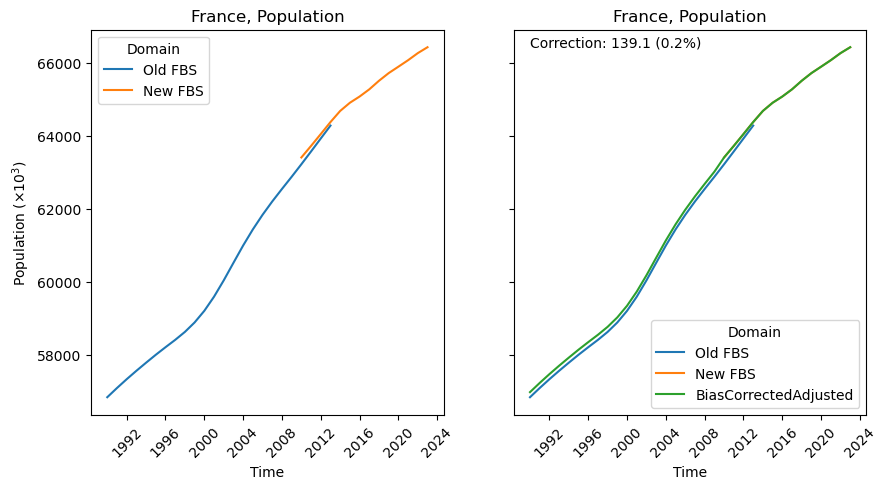

In [19]:
df = pd.read_csv('/Users/myliheik/Documents/myPython/FBSadjusted/results/Total-Population-Both-sexes-2023.csv')

myElement = 'Total Population - Both sexes'

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'France'
myItemCode = int(myItemsDict.get('Population'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show

2501


<function matplotlib.pyplot.show(close=None, block=None)>

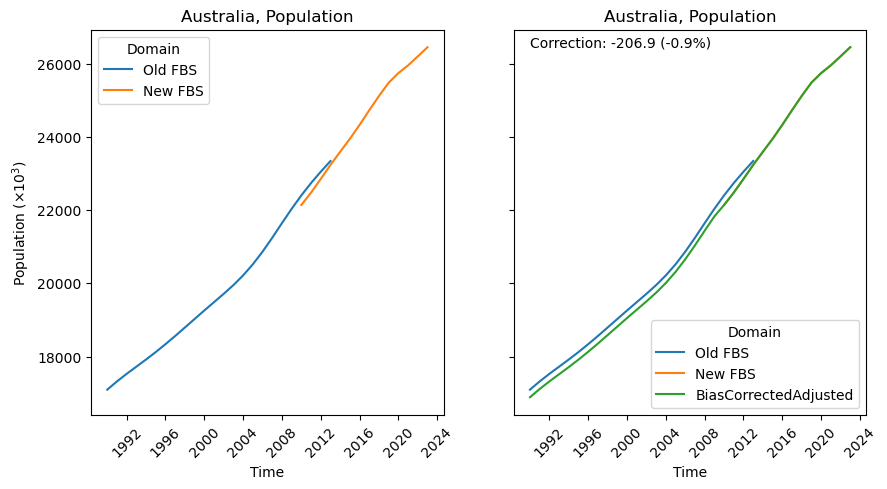

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(10, 5))

mycountry = 'Australia'
myItemCode = int(myItemsDict.get('Population'))
print(myItemCode)

plotting7(df, mycountry, myElement, myItemCode, 1990, ax1)

plotting8(df, mycountry, myElement, myItemCode, 1990, ax2)
plt.show